# Value at risk

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy

## Fetching Data and Creating Data Frames

In [43]:
# Create our portfolio of equities
tickers = ['^MERV']
 
# Set the investment weights (I arbitrarily picked for example)
weights = np.array([1])
 
# Set an initial investment level
initial_investment = 1000000
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2018-04-01", end=dt.date.today())['Open']
 
#From the closing prices, calculate periodic returns
returns = data.pct_change()

print (returns)

Symbols        ^MERV
Date                
2018-04-03       NaN
2018-04-04  0.007265
2018-04-05 -0.000721
2018-04-06  0.017503
2018-04-09 -0.004012
2018-04-10  0.003329
2018-04-11  0.011869
2018-04-12 -0.005945
2018-04-13  0.000248
2018-04-16 -0.013911
2018-04-17 -0.018526
2018-04-18  0.012738
2018-04-19  0.004112
2018-04-20 -0.007947
2018-04-23 -0.003824
2018-04-24 -0.007080
2018-04-25 -0.012030
2018-04-26 -0.020348
2018-04-27 -0.015327
2018-05-02  0.017585
2018-05-03 -0.013076
2018-05-04 -0.003734
2018-05-07 -0.032204
2018-05-08 -0.036448
2018-05-09 -0.044926
2018-05-10  0.062086
2018-05-11  0.060654
2018-05-14  0.008493
2018-05-15  0.019749
2018-05-16  0.007731
...              ...
2020-01-23  0.012450
2020-01-24 -0.020526
2020-01-27 -0.029713
2020-01-28 -0.007847
2020-01-29  0.030934
2020-01-30 -0.011959
2020-01-31  0.001327
2020-02-03 -0.007177
2020-02-04  0.036704
2020-02-05 -0.013067
2020-02-06 -0.006499
2020-02-07  0.003409
2020-02-10  0.007525
2020-02-11 -0.003905
2020-02-12 -0

In [17]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

Symbols,^MERV
Symbols,
^MERV,0.001046


In [18]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
avg_rets.head()

Symbols
^MERV    0.000931
dtype: float64

In [28]:
returns.describe()

Symbols,^MERV
count,470.000000
mean,0.000931
std,0.032337
min,-0.379311
25%,-0.014061
50%,0.001169
75%,0.017426
max,0.103968


In [21]:
# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
print (port_mean)

0.0009314238672275678


In [22]:
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print (port_stdev)

0.03233663479657294


## Normally distributed Check

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


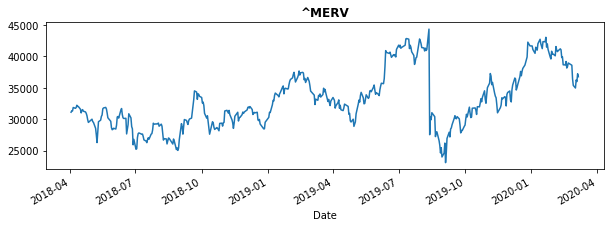

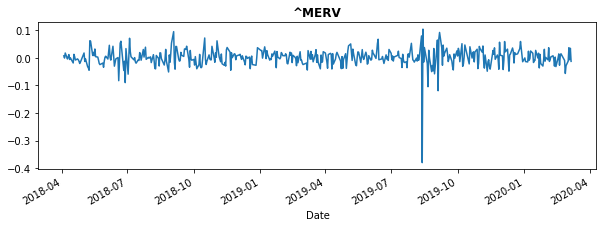

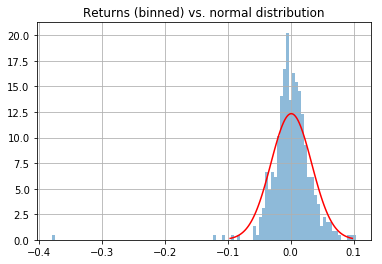

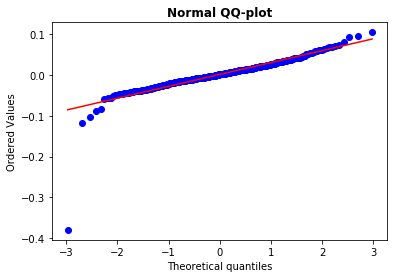

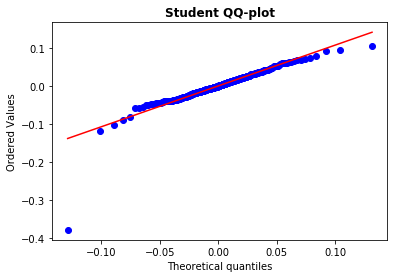

In [57]:
for ticker in tickers:
    fig = plt.figure()
    fig.set_size_inches(10,3)
    data[ticker].plot(y="open")
    plt.title(ticker, weight="bold");
    
    fig = plt.figure()
    fig.set_size_inches(10,3)
    returns[ticker].plot(y="open")
    plt.title(ticker, weight="bold");
    
    returns.hist(bins=100, normed=True,histtype="stepfilled",alpha=0.5)
    x = np.linspace(returns[ticker].mean() - 3*returns[ticker].std(), returns[ticker].mean() + 3*returns[ticker].std(),100)
    plt.plot(x, scipy.stats.norm.pdf(x, returns[ticker].mean(), returns[ticker].std()), "r")
    plt.title("Returns (binned) vs. normal distribution")
    plt.show()
    
    Q = data[ticker].pct_change().dropna()
    scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
    plt.title("Normal QQ-plot", weight="bold");
    
    tdf, tmean, tsigma = scipy.stats.t.fit(Q)
    scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
    plt.title("Student QQ-plot", weight="bold")
    

## VAR

In [23]:
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
print (mean_investment)

1000931.4238672275


In [25]:
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev
print ( stdev_investment)

32336.634796572944


In [30]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
print (cutoff1)

947742.3928386793


In [60]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
print('Value at Risk is : {}'.format(var_1d1))


Value at Risk is : 52257.607161320746


# Value at risk over n-day time period

1 day VaR @ 95% confidence: 52257.61
2 day VaR @ 95% confidence: 73903.42
3 day VaR @ 95% confidence: 90512.83
4 day VaR @ 95% confidence: 104515.21
5 day VaR @ 95% confidence: 116851.56
6 day VaR @ 95% confidence: 128004.47
7 day VaR @ 95% confidence: 138260.63
8 day VaR @ 95% confidence: 147806.83
9 day VaR @ 95% confidence: 156772.82
10 day VaR @ 95% confidence: 165253.06
11 day VaR @ 95% confidence: 173318.88
12 day VaR @ 95% confidence: 181025.66
13 day VaR @ 95% confidence: 188417.48
14 day VaR @ 95% confidence: 195530.06
15 day VaR @ 95% confidence: 202392.84
16 day VaR @ 95% confidence: 209030.43
17 day VaR @ 95% confidence: 215463.63
18 day VaR @ 95% confidence: 221710.25
19 day VaR @ 95% confidence: 227785.63
20 day VaR @ 95% confidence: 233703.12
21 day VaR @ 95% confidence: 239474.44
22 day VaR @ 95% confidence: 245109.9
23 day VaR @ 95% confidence: 250618.68
24 day VaR @ 95% confidence: 256008.95
25 day VaR @ 95% confidence: 261288.04
26 day VaR @ 95% confidence: 266462.56

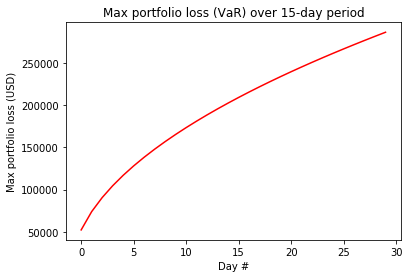

In [39]:
# Calculate n Day VaR
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

VAR as quantopian: https://www.quantopian.com/posts/quantopian-lecture-series-var-and-cvar-expected-shortfall

In [61]:
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=200):
    returns = returns.fillna(0.0)
    # Multiply asset returns by weights to get one weighted portfolio return
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # Compute the correct percentile loss and multiply by value invested
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [62]:
value_invested = 1000000

value_at_risk(value_invested, returns, weights, alpha=0.95)

-42441.034159003626

In [67]:
lookback_days = 100
alpha = 0.95

# Multiply asset returns by weights to get one weighted portfolio return
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

In [68]:
from statsmodels.stats.stattools import jarque_bera

_, pvalue, _, _ = jarque_bera(portfolio_returns)

if pvalue > 0.05:
    print('The portfolio returns are likely normal.')
else:
    print('The portfolio returns are likely not normal.')

The portfolio returns are likely normal.


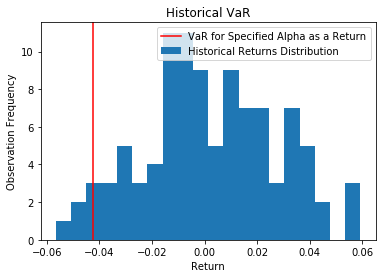

In [69]:
portfolio_VaR = value_at_risk(value_invested, returns, weights, alpha=0.95)
# Need to express it as a return rather than absolute loss
portfolio_VaR_return = portfolio_VaR / value_invested

plt.hist(portfolio_returns, bins=20)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.legend(['VaR for Specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical VaR');
plt.xlabel('Return');
plt.ylabel('Observation Frequency');

In [71]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(portfolio_returns)
pvalue = results[1]

if pvalue < 0.05:
    print('Process is likely stationary.')
else:
    print('Process is likely non-stationary.')

Process is likely stationary.


# Conditional Value at Risk (CVaR)


In [72]:
def cvar(value_invested, returns, weights, alpha=0.95, lookback_days=200):
    # Call out to our existing function
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    # Get back to a return rather than an absolute loss
    var_pct_loss = var / value_invested
    
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

In [73]:
cvar(value_invested, returns, weights, alpha=0.95)

-95479.77827659718

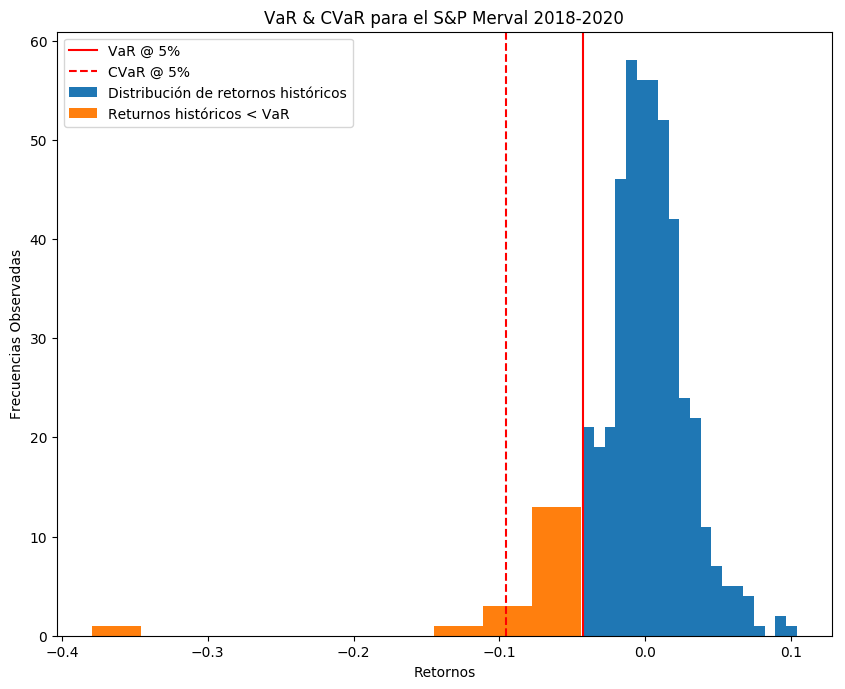

In [87]:
lookback_days = 520
alpha = 0.95

# Multiply asset returns by weights to get one weighted portfolio return
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(value_invested, returns, weights, alpha=0.95)
# Need to express it as a return rather than absolute loss
portfolio_VaR_return = portfolio_VaR / value_invested

portfolio_CVaR = cvar(value_invested, returns, weights, alpha=0.95)
# Need to express it as a return rather than absolute loss
portfolio_CVaR_return = portfolio_CVaR / value_invested

# Plot only the observations > VaR on the main histogram so the plot comes out
# nicely and doesn't overlap.
plt.figure(
    figsize=(10, 8),
    dpi=100)
plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed');
plt.legend(['VaR @ 5%',
            'CVaR @ 5%',
            'Distribución de retornos históricos', 
            'Returnos históricos < VaR'])
plt.title('VaR & CVaR para el S&P Merval 2018-2020');
plt.xlabel('Retornos');
plt.ylabel('Frecuencias Observadas');

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


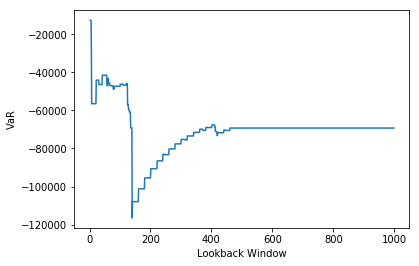

In [84]:
N = 1000
CVaRs = np.zeros((N, 1))
for i in range(N):
    CVaRs[i] = cvar(value_invested, returns, weights, lookback_days=i)

plt.plot(CVaRs)
plt.xlabel('Lookback Window')
plt.ylabel('VaR');